<a href="https://colab.research.google.com/github/cahyaa02/Random-Forest-Classification/blob/main/ALP_Statistics_and_Probability_Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Breast Cancer Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Packages

In [ ]:
# Data preprocessing & EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Data Collection & Preprocessing

[Data Source](https://www.kaggle.com/code/yasserh/breast-cancer-diagnosis-best-ml-algorithms/data)

In [ ]:
# Read data
df = pd.read_csv("/content/drive/MyDrive/ALP Statistics and Probability/breast-cancer.csv")

# Glimpse of the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Check data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Berdasarkan tabel di atas, dapat dilihat bahwa tidak ada variabel yang memiliki missing value, dan juga seluruh tipe data benar. Kita hanya perlu mengubah target variable : `diagnosis` ke dalam bentuk 0/1.

Data used:

- Target variable: `diagnosis`
- Predictors:
  - `radius_mean`
  - `texture_mean`
  - `perimeter_mean`          
  - `area_mean`
  - `smoothness_mean`
  - `compactness_mean`
  - `concavity_mean`
  - `concave_points_mean`
  - `symmetry_mean`
  - `fractal_dimension_mean` 

Untuk pembahasan artikel ini, kita fokus ke rata" dari masing" variabel saja untuk memudahkan penjelasan metode-metode yang ada.

In [ ]:
# Variable selection
df = df[df.columns[1:12]] # Untuk melihat nama kolom di tabel pada index ke-1 s.d. 12

In [ ]:
# Data encoding for target variable
encoder = LabelEncoder()
df.diagnosis = encoder.fit_transform(df.diagnosis)

# Glimpse of the data
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [ ]:
# Check the encoded class
class_label = encoder.classes_
class_label

array(['B', 'M'], dtype=object)

In [ ]:
# Check duplicated values
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean


## Exploratory Data Analysis

### Univariative

1. Descriptive Statistics

In [ ]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


Mention tentang range data yang terlalu luas - butuh standarisasi.

2. Data Distribution

a. Categorical data

In [ ]:
diagnosis, diagnosis_count = np.unique(df.diagnosis, return_counts = True)

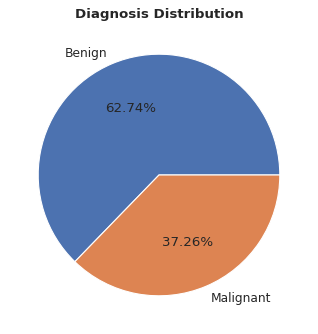

In [ ]:
# Pie chart of `diagnosis`
plt.figure(figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.pie(diagnosis_count, labels = ['Benign','Malignant'], autopct="%1.2f%%")
plt.title("Diagnosis Distribution", fontweight='bold');

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


b. Continuous data

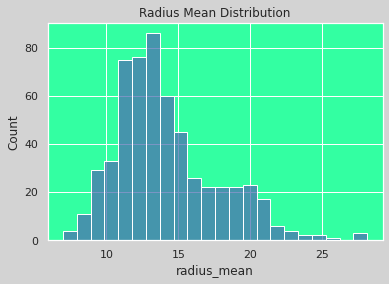

In [ ]:
predictors_name = df.columns[1:]
sns.set(rc={'axes.facecolor':'#33FFA2', 'figure.facecolor':'lightgrey'})
sns.histplot(df, x= predictors_name[0])
plt.title("Radius Mean Distribution");

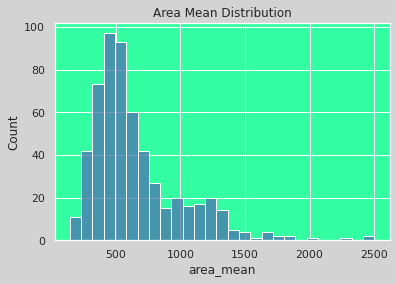

In [ ]:
predictors_name = df.columns[1:]
sns.histplot(df, x = predictors_name[3])
plt.title("Area Mean Distribution");

3. Outlier Detection

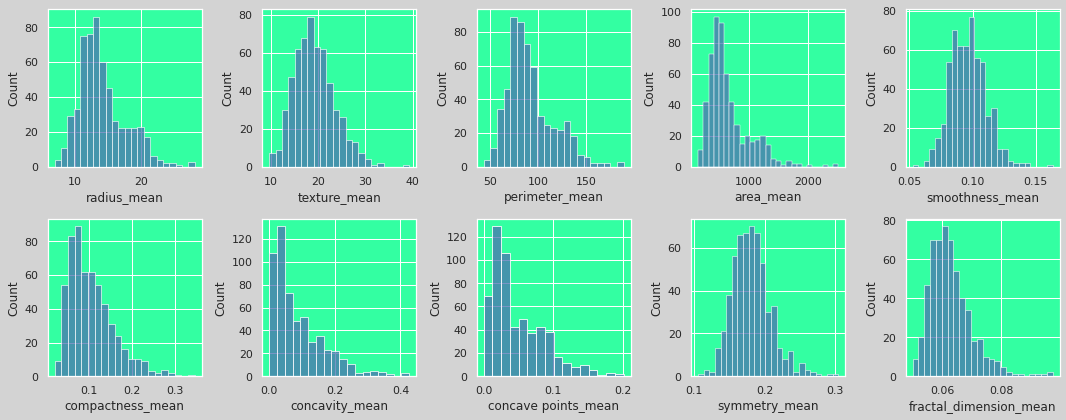

In [ ]:
# Combine all Histograms
plt.figure(figsize = [15,6])
for i in range(len(predictors_name)):
  plt.subplot(2, 5, i+1)
  sns.histplot(df, x = predictors_name[i])
plt.tight_layout()
plt.show()

Berdasarkan Histogram diatas, mayoritas data tidak berdistribusi normal, melainkan skewed to the right. Artinya, mayoritas data memiliki outlier atas. Selanjutnya, kita coba untuk deteksi outlier tersebut.

Text(0.5, 1.0, 'Radius Mean Distribution')

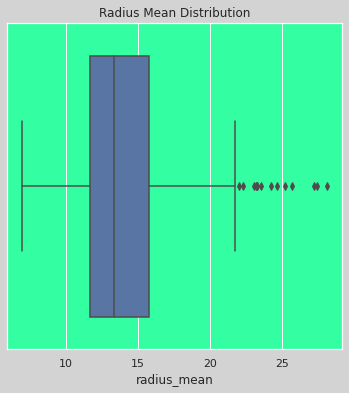

In [ ]:
plt.figure(figsize=[6,6])
sns.boxplot(x = df[predictors_name[0]])
plt.title("Radius Mean Distribution")

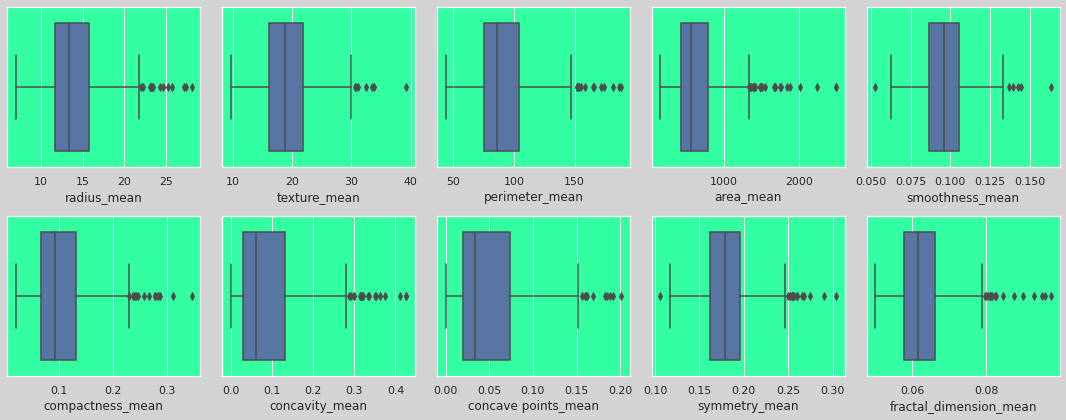

In [ ]:
# Combine all Boxplot
plt.figure(figsize = [15,6])
for i in range(len(predictors_name)):
  plt.subplot(2, 5, i+1)
  sns.boxplot(x = df[predictors_name[i]])
plt.tight_layout()
plt.show()

In [ ]:
# Outlier removal
for i in range(len(predictors_name)):
  q1 = np.quantile(df[predictors_name[i]], 0.25)
  q3 = np.quantile(df[predictors_name[i]], 0.75)
  iqr = q3-q1
  upper_bound = q3 + (1.5*iqr)
  lower_bound = q1 - (1.5*iqr)
  df = df[df[predictors_name[i]] <= upper_bound]
  df = df[df[predictors_name[i]] >= lower_bound]

In [ ]:
df.reset_index(inplace=True, drop=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
1,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
2,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
3,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389
4,1,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697
...,...,...,...,...,...,...,...,...,...,...,...
453,0,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059
454,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147
455,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570
456,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171


### Multivariative

1. Correlation Plot

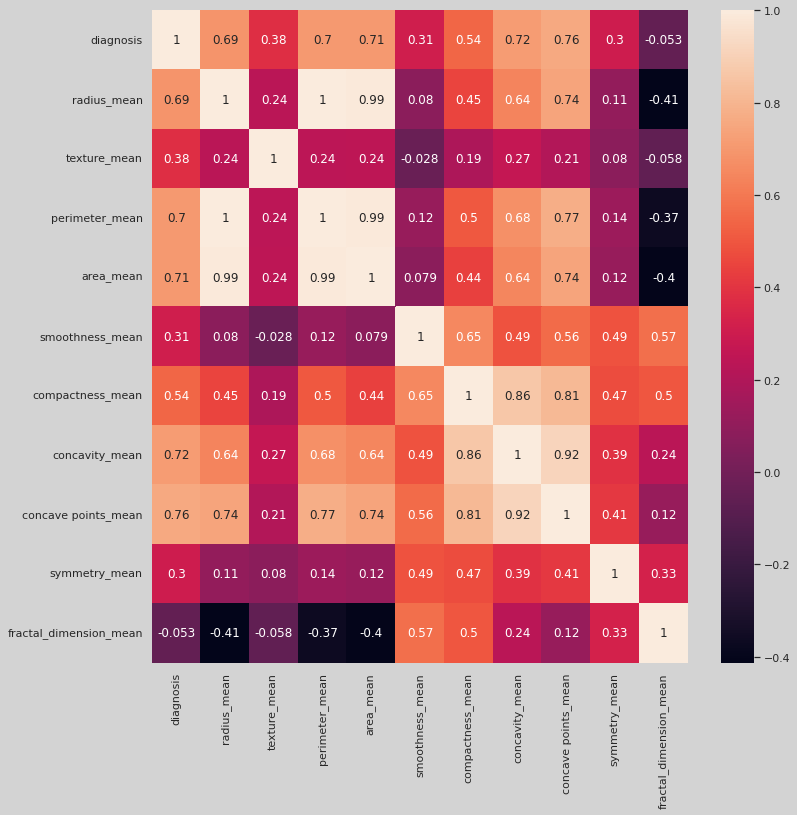

In [ ]:
plt.figure(figsize = [12,12])
sns.heatmap(df.corr(), annot = True)

- Jika antar variabel x (prediktor) -> korelasi harus rendah
- Jika antar variabel x dan y -> korelasi harus tinggi

Radius_mean dengan perimeter_mean punya korelasi sebesar 1. Artinya terdapat multikolinearitas, dan kita perlu membuang salah satu variabel. Untuk menentukan variabel mana yang perlu didrop, kita lihat korelasi antar masing" variabel dengan variabel diagnosis (target variabel / y). Dari heatmap, diketahui korelasi antar radius_mean & diagnosis sebesar 0.69, sedangkan korelasi antar perimeter_mean & diagnosis sebesar 0.7. Karena korelasi antar radius_mean & diagnosis lebih kecil dibandingkan perimeter_mean & diagnosis, maka kita drop radius_mean.

In [ ]:
df.drop("radius_mean", axis = 1, inplace = True)

2. Pair Plot

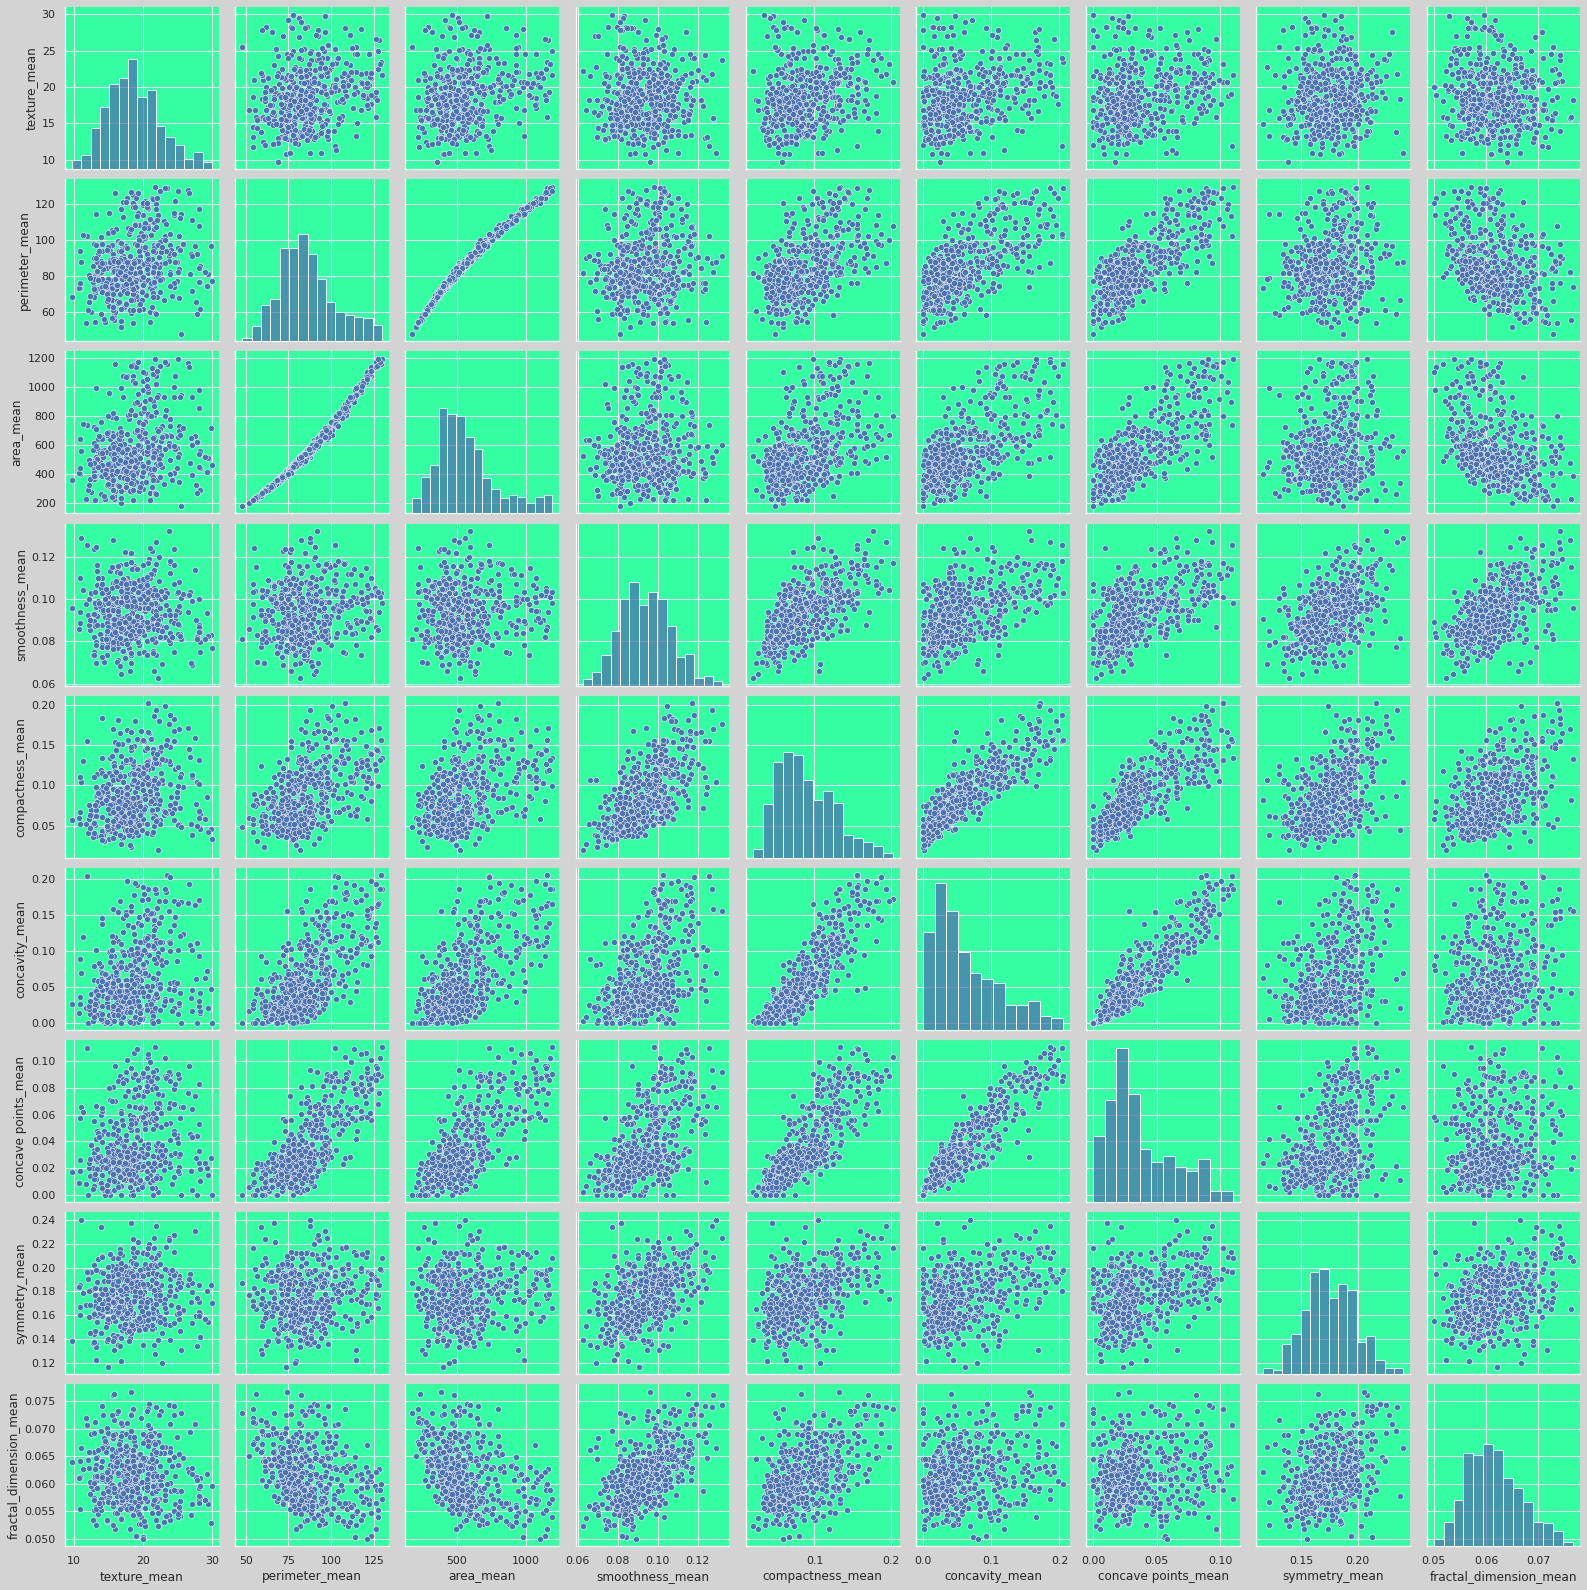

In [ ]:
sns.pairplot(df[df.columns[1:]]);

3. Contingency Table

In [ ]:
pd.pivot_table(df, index = "diagnosis", values = df.columns[1:], aggfunc="max")

,area_mean,compactness_mean,concave points_mean,concavity_mean,fractal_dimension_mean,perimeter_mean,smoothness_mean,symmetry_mean,texture_mean
diagnosis,,,,,,,,,
0,992.1,0.1836,0.08534,0.1548,0.07669,114.6,0.1291,0.2403,29.97
1,1194.0,0.2022,0.11030,0.2049,0.07613,129.9,0.1323,0.2350,29.81


## Modeling

1. Data Standardization

In [ ]:
Y = df[["diagnosis"]]
X = df[df.columns[1:]]

In [ ]:
standardize = StandardScaler()
X_std = standardize.fit_transform(X)

In [ ]:
X_std = pd.DataFrame(X_std, columns = df.columns[1:])

2. Train-Test Splitting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, train_size=0.8, test_size=0.2, random_state=0)

### Random Forest

In [ ]:
# Model fitting
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
# Prediction
prediction = rf.predict(X_test)

In [ ]:
# Evaluation
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        70
           1       0.80      0.91      0.85        22

    accuracy                           0.92        92
   macro avg       0.89      0.92      0.90        92
weighted avg       0.93      0.92      0.93        92

